In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import json

In [1]:
image = Image.open('data/myExportImageTask.tif')
# Convert the image data to a numpy array
image_data = np.array(image)

# Display the image
print(image_data.shape)
plt.imshow(image_data, cmap='gray')  # Use 'gray' for grayscale images, or remove it for color images
plt.axis('off')  # Hide the axis
plt.show()

NameError: name 'Image' is not defined

In [3]:



t = tf.data.TFRecordDataset("data/Oros_2-00000.tfrecord.gz", compression_type='GZIP')
with open('data/Oros_2-mixer.json') as file:
    mixer = json.load(file)


# Get relevant info from the JSON mixer file.
patch_width = mixer['patchDimensions'][0]
patch_height = mixer['patchDimensions'][1]
patches = mixer['totalPatches']
patch_dimensions_flat = [patch_width, patch_height]
     




print(iter(t).next())






#parsedDataset = t.map(lambda example: tf.io.parse_single_example(example, featuresDict))

tf.Tensor(b'\n\x96 \n\x93 \n\x08FireMask\x12\x86 \n\x83 \n\x80 \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [4]:
BANDS = ['FireMask']

FEATURE_NAMES = list(BANDS)
# List of fixed-length features, all of which are float32.
columns = [
  tf.io.FixedLenFeature(shape=(), dtype=tf.string) for k in FEATURE_NAMES
]

# Dictionary with names as keys, features as values.
features_dict = dict(zip(FEATURE_NAMES, columns))

print(features_dict)



{'FireMask': FixedLenFeature(shape=(), dtype=tf.string, default_value=None)}


In [5]:
def parse_tfrecord(example_proto):
    """The parsing function.

    Read a serialized example into the structure defined by featuresDict.

    Args:
        example_proto: a serialized Example.

    Returns:
        A tuple of the predictors dictionary and the label, cast to an `int32`.
    """
    parsed_features = tf.io.parse_single_example(example_proto, features_dict)

    raw_bytes = tf.io.decode_raw(parsed_features['FireMask'], tf.float32)
    # Reshape the tensor to its original dimensions
    raw_bytes = tf.reshape(raw_bytes, [32,32])
    return {'FireMask': raw_bytes}

# Map the function over the dataset.
parsed_dataset = t.map(parse_tfrecord, num_parallel_calls=5)

# Print the first parsed record to check.
print(iter(parsed_dataset).next())

{'FireMask': <tf.Tensor: shape=(32, 32), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>}


In [7]:
parsedDataset = t.map(parse_tfrecord)

# Function to display the FireMask
def display_firemask(firemask, index):
    plt.imshow(firemask, cmap='gray', vmin=0, vmax=1)
    plt.title(f'FireMask Example {index + 1}')
    plt.axis('off')  # Hide axes
    plt.show()

# Iterate through the parsed dataset and display the results
for index, example in enumerate(parsedDataset.take(73)):
    firemask = example['FireMask'].numpy()
    #print(firemask.max())
    #display_firemask(firemask, index)

In [8]:
t = tf.data.TFRecordDataset("data/Oros_2-00000.tfrecord")
with open('data/Oros_2-mixer.json') as file:
    mixer = json.load(file)


# Get relevant info from the JSON mixer file.
patch_width = mixer['patchDimensions'][0]
patch_height = mixer['patchDimensions'][1]
patches = mixer['totalPatches']
patch_dimensions_flat = [patch_width, patch_height]
     




print(iter(t).next())


tf.Tensor(b'\n\x9a\x80\x01\n\x96\x80\x01\n\x08FireMask\x12\x88\x80\x01\x12\x84\x80\x01\n\x80\x80\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [11]:
FEATURES = ['FireMask']
KERNEL_SIZE = 64
KERNEL_SHAPE = [KERNEL_SIZE, KERNEL_SIZE]
COLUMNS = [
  tf.io.FixedLenFeature(shape=KERNEL_SHAPE, dtype=tf.float32) for k in FEATURES
]
FEATURES_DICT = dict(zip(FEATURES, COLUMNS))


def parse_tfrecord_float(example_proto):

    return tf.io.parse_single_example(example_proto, FEATURES_DICT)

# Map the function over the dataset.



parsed_dataset = t.map(parse_tfrecord_float, num_parallel_calls=5)

# Print the first parsed record to check.
print(iter(parsed_dataset).next())

{'FireMask': <tf.Tensor: shape=(64, 64), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>}


In [13]:
for index, example in enumerate(parsed_dataset.take(73)):
    firemask = example['FireMask'].numpy()
    #print(firemask.max())
    #display_firemask(firemask, index)

In [15]:
t = tf.data.TFRecordDataset("data/Oros_2_crs-00000.tfrecord")
parsed_dataset = t.map(parse_tfrecord_float, num_parallel_calls=5)
print(iter(parsed_dataset).next())

{'FireMask': <tf.Tensor: shape=(64, 64), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>}


In [17]:
for index, example in enumerate(parsed_dataset.take(73)):
    firemask = example['FireMask'].numpy()
    #print(firemask.max())
    #display_firemask(firemask, index)

In [7]:
FEATURES = ['fire_mask', 'fire_mask_next_day', 'elevation', 'wind_direction', 'wind_speed', 'energy_release_component', 'burn_index', 'precipitation', 'tempature_min', 'tempature_max', 'drought_index', 'vegetation', 'population_density']
KERNEL_SIZE = 64
KERNEL_SHAPE = [KERNEL_SIZE, KERNEL_SIZE]
COLUMNS = [
  tf.io.FixedLenFeature(shape=KERNEL_SHAPE, dtype=tf.float32) for k in FEATURES
]
FEATURES_DICT = dict(zip(FEATURES, COLUMNS))

t = tf.data.TFRecordDataset("data/FireData-00000_python.tfrecord.gz", compression_type='GZIP')

def parse_tfrecord_float(example_proto):

    return tf.io.parse_single_example(example_proto, FEATURES_DICT)

# Map the function over the dataset.



parsed_dataset = t.map(parse_tfrecord_float, num_parallel_calls=5)

# Print the first parsed record to check.
print(iter(parsed_dataset).next())

{'burn_index': <tf.Tensor: shape=(64, 64), dtype=float32, numpy=
array([[71.340385, 71.6697  , 71.836685, ..., 65.20784 , 64.93585 ,
        64.82234 ],
       [71.54626 , 71.838776, 71.97145 , ..., 65.17691 , 64.88901 ,
        64.706215],
       [71.41639 , 71.77484 , 71.95041 , ..., 65.185135, 64.8862  ,
        64.62125 ],
       ...,
       [57.233448, 57.02622 , 56.827057, ..., 66.726875, 66.749214,
        66.71044 ],
       [56.876434, 56.638218, 56.402   , ..., 65.73095 , 65.6252  ,
        65.546585],
       [56.837437, 56.639915, 56.424755, ..., 64.8919  , 64.66621 ,
        64.55134 ]], dtype=float32)>, 'drought_index': <tf.Tensor: shape=(64, 64), dtype=float32, numpy=
array([[-3.2409067, -3.2610114, -3.284723 , ..., -3.2561812, -3.2581716,
        -3.2275634],
       [-3.258069 , -3.2834766, -3.3108912, ..., -3.2972052, -3.2969048,
        -3.2627609],
       [-3.2834601, -3.305133 , -3.329089 , ..., -3.3339994, -3.3304439,
        -3.2937825],
       ...,
       [-4.13443

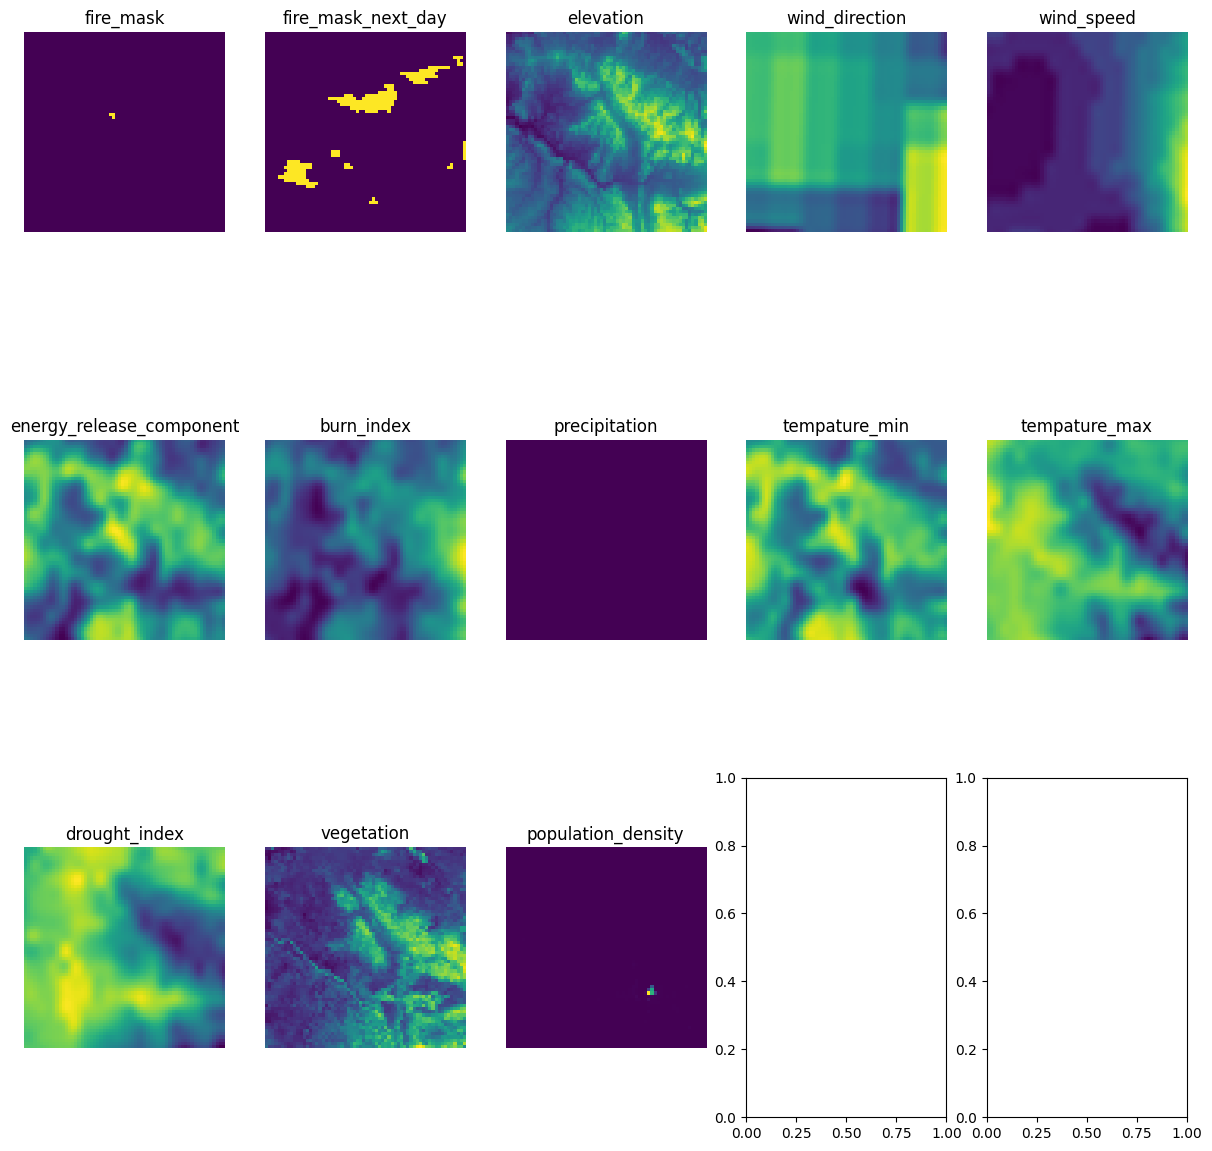

In [8]:
num_features = len(FEATURES)
cols = 5  # Number of columns for subplots
rows = (num_features + cols - 1) // cols  # Calculate the number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
axes = axes.flatten()

for example in parsed_dataset.take(11):
    for i, feature in enumerate(FEATURES):
        f_np = example[feature].numpy()
        im = axes[i].imshow(f_np, vmin=np.min(f_np), vmax=np.max(f_np), cmap='viridis')
        axes[i].set_title(feature)
        axes[i].axis('off')



